In [1]:
import pandas as pd

In [2]:
location = "freq_kata.csv"

In [3]:
df = pd.read_csv(location)

In [4]:
from matplotlib import pyplot as plt

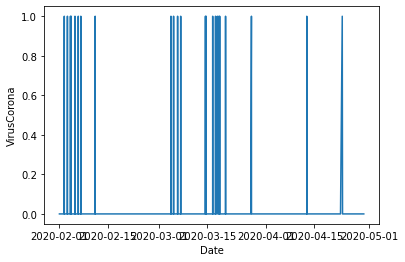

In [5]:
df = pd.read_csv(location, parse_dates = ['created_at'], index_col = ['created_at'])
df.drop(df.columns[0], axis=1, inplace=True)
plt.xlabel('Date')
plt.ylabel('VirusCorona')
plt.plot(df)


In [6]:
df.index = df.index.to_period('D')
df.head()

,viruscorona
created_at,
2020-02-01,0
2020-02-01,0
2020-02-01,0
2020-02-01,0
2020-02-01,0


In [7]:
df = df.groupby('created_at').sum()
df.head()

,viruscorona
created_at,
2020-02-01,0
2020-02-02,1
2020-02-03,1
2020-02-04,5
2020-02-05,1


In [8]:
from pandas.plotting import autocorrelation_plot

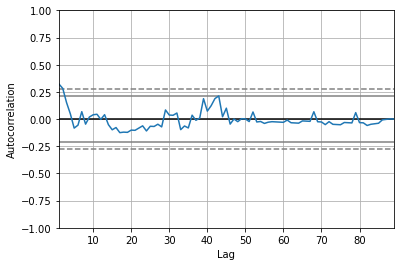

In [9]:
autocorrelation_plot(df)
plt.show()

Lag = 10

In [10]:
from statsmodels.tsa.arima.model import ARIMA
# fit model
model = ARIMA(df, order=(10,1,0))
model_fit = model.fit()

In [11]:
# summary of fit model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:            viruscorona   No. Observations:                   89
Model:                ARIMA(10, 1, 0)   Log Likelihood                 -85.714
Date:                Fri, 16 Apr 2021   AIC                            193.428
Time:                        14:20:01   BIC                            220.678
Sample:                    02-01-2020   HQIC                           204.406
                         - 04-29-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6809      0.098     -6.936      0.000      -0.873      -0.488
ar.L2         -0.3721      0.133     -2.792      0.005      -0.633      -0.111
ar.L3         -0.3044      0.172     -1.770      0.0

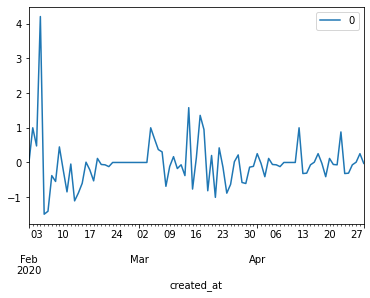

In [12]:
# line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()

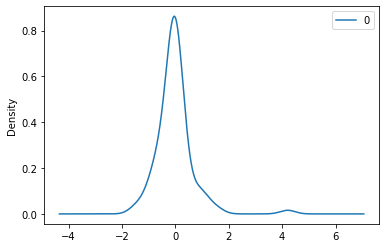

In [13]:
# density plot of residuals
residuals.plot(kind='kde')
plt.show()

In [14]:
# summary stats of residuals
print(residuals.describe())

               0
count  89.000000
mean   -0.019183
std     0.691836
min    -1.492091
25%    -0.308731
50%    -0.026600
75%     0.116654
max     4.207753


# Forecasting Timeseries

In [15]:
from sklearn.metrics import mean_squared_error
from math import sqrt

Merah = predictions
Biru = expected value

predicted=0.410638, expected=0.000000
predicted=-0.113768, expected=1.000000
predicted=0.356424, expected=1.000000
predicted=0.667272, expected=5.000000
predicted=2.377672, expected=1.000000
predicted=2.335888, expected=1.000000
predicted=0.421279, expected=1.000000
predicted=0.457693, expected=0.000000
predicted=-0.150723, expected=0.000000
predicted=0.000297, expected=0.000000
predicted=1.397600, expected=1.000000
predicted=0.364627, expected=0.000000
predicted=0.955955, expected=0.000000
predicted=1.864450, expected=0.000000
predicted=0.537776, expected=0.000000
predicted=0.076035, expected=0.000000
predicted=0.253331, expected=0.000000
predicted=0.389078, expected=0.000000
predicted=-0.079562, expected=0.000000
predicted=-0.023716, expected=0.000000
predicted=0.158392, expected=0.000000
predicted=0.053211, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=-0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predict

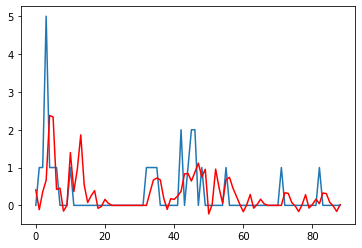

In [16]:
# split into train and test sets
X = df.values
#size = int(len(X) * 0.66)
#train, test = X[0:size], X[size:len(X)]
train, test = X, X
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(10,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()